In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_vars(fname, dirname, dep_ind, time_ind):
    
    if fname == '1_MCKNZ_1h_20170101_201701*':
        maskname = '1_mesh_mask.nc'
    elif fname == 'MCKNZ_1h_20170101_201701*':
        maskname = 'mesh_mask.nc'
    
    y,x = slice(1,-1,None), slice(1,-1,None)
    
    filesT = general_functions.get_files(dirname, fname, 'grid_T')
    filesU = general_functions.get_files(dirname, fname, 'grid_U')
            
    with scDataset(filesT) as dsT, scDataset(filesU) as dsU:
        deptht = dsT.variables['deptht'][:]
        vosaline0 = dsT.variables['vosaline'][time_ind, dep_ind, y, x]
        
    with nc.Dataset(os.path.join(dirname, maskname), 'r') as dsM:
        tmask = dsM.variables['tmask'][0, dep_ind, y, x]
        e3t = dsM.variables['e3t_0'][0, dep_ind, y, x]
        
    vosaline = np.ma.array(vosaline0, mask=1 - tmask)
    
    return vosaline, deptht, tmask, e3t

In [3]:
def get_vel(fname, dirname, time_ind, y, x):
    
    if fname == '1_MCKNZ_1h_20170101_201701*':
        maskname = '1_mesh_mask.nc'
    elif fname == 'MCKNZ_1h_20170101_201701*':
        maskname = 'mesh_mask.nc'
    
    filesU = general_functions.get_files(dirname, fname, 'grid_U')
    filesV = general_functions.get_files(dirname, fname, 'grid_V')
    filesW = general_functions.get_files(dirname, fname, 'grid_W')
    
    with scDataset(filesU) as dsU, scDataset(filesV) as dsV, scDataset(filesW) as dsW: 
        vozocrtx0 = dsU.variables['vozocrtx'][time_ind,:,y,x]
        vomecrty0 = dsV.variables['vomecrty'][time_ind,:,y,x]
        vovecrtz0 = dsW.variables['vovecrtz'][time_ind,:,y,x]
        
    with nc.Dataset(os.path.join(dirname, maskname), 'r') as dsM:
        umask = dsM.variables['umask'][0,:,y,x]
        vmask = dsM.variables['vmask'][0,:,y,x]
        tmask = dsM.variables['tmask'][0,:,y,x]
        
    vozocrtx = np.ma.array(vozocrtx0, mask=1 - umask)
    vomecrty = np.ma.array(vomecrty0, mask=1 - vmask)
    vovecrtz = np.ma.array(vovecrtz0, mask=1 - tmask)
    
    return vozocrtx, vomecrty, vovecrtz

In [4]:
def plot_salt(dep_ind, time_ind, vosaline_ref):
    
    dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/'
    cases = ['ideal_base/', 'ideal_base_nambfr/', 'ideal_base_e3zps']
    fnames = ['1_MCKNZ_1h_20170101_201701*', 'MCKNZ_1h_20170101_201701*']
    vmin, vmax = 30, vosaline_ref.max()
    
    fig, (axesA, axesB) = plt.subplots(len(fnames), len(cases), figsize=(20, 14))
    for axes, fname, m in zip([axesA, axesB], fnames, np.arange(len(fnames))):
        for ax, case, n in zip(axes.flatten(), cases, np.arange(len(cases))):
            vosaline, deptht, tmask, e3t = get_vars(fname, dirname+case, dep_ind, time_ind)
            p = ax.pcolormesh(vosaline, cmap=cm.Spectral_r, vmin=vmin, vmax=vmax)
            cbar = fig.colorbar(p, ax=ax, orientation='horizontal', fraction=0.04, pad=0.05)
            ax.set_aspect(aspect='equal')
            ax.set_title(case + '\n max sal: ' + str(vosaline.max()), fontsize=16)
            ax.set_xlim([0,vosaline.shape[-1]])
            ax.set_ylim([0,vosaline.shape[-2]])
            fig.tight_layout(rect=[0, 0.03, 1, 0.93])
            fig.suptitle('depth slice: ' + str(deptht[dep_ind]) + ', time [hrs]: ' + str(time_ind), fontsize=25)
        
    return fig

# Initial Salinity Profile 
## Max salinity 35.0629, located at the bottom-most index

In [5]:
vosaline_ref = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')['vosaline'][0, :, 0, 0]
for z in range(len(vosaline_ref)):
    print(str(z) + '-- ' + str(vosaline_ref[z]))
print('MAXIMUM-- ' + str(vosaline_ref.max()))

0-- 22.1943
1-- 27.4241
2-- 28.7108
3-- 29.3442
4-- 29.9331
5-- 30.2523
6-- 30.7269
7-- 31.2098
8-- 31.6015
9-- 31.9925
10-- 32.2865
11-- 32.5529
12-- 32.8522
13-- 33.2351
14-- 33.4181
15-- 33.5879
16-- 33.7455
17-- 33.8842
18-- 34.0275
19-- 34.1689
20-- 34.256
21-- 34.3465
22-- 34.4552
23-- 34.5092
24-- 34.5697
25-- 34.6244
26-- 34.6743
27-- 34.7154
28-- 34.7544
29-- 34.792
30-- 34.8289
31-- 34.8412
32-- 34.862
33-- 34.8812
34-- 34.8961
35-- 34.9088
36-- 34.9198
37-- 34.9309
38-- 34.9304
39-- 34.9413
40-- 34.9496
41-- 34.9564
42-- 34.965
43-- 34.966
44-- 34.9659
45-- 34.9709
46-- 34.9758
47-- 34.9788
48-- 34.9778
49-- 34.9787
50-- 34.9816
51-- 34.9855
52-- 34.9887
53-- 34.9905
54-- 34.9936
55-- 34.9955
56-- 34.9965
57-- 34.9964
58-- 34.9974
59-- 34.9995
60-- 35.0004
61-- 35.0033
62-- 35.0083
63-- 35.0133
64-- 35.0163
65-- 35.0193
66-- 35.0233
67-- 35.0263
68-- 35.0294
69-- 35.0323
70-- 35.0353
71-- 35.0384
72-- 35.0414
73-- 35.0445
74-- 35.0476
75-- 35.0506
76-- 35.0536
77-- 35.0567
7

# Checking Child and Parent Salinities
## At 10 day mark
## Unrealistic salinities in parent too

In [10]:
time_ind = 4*24

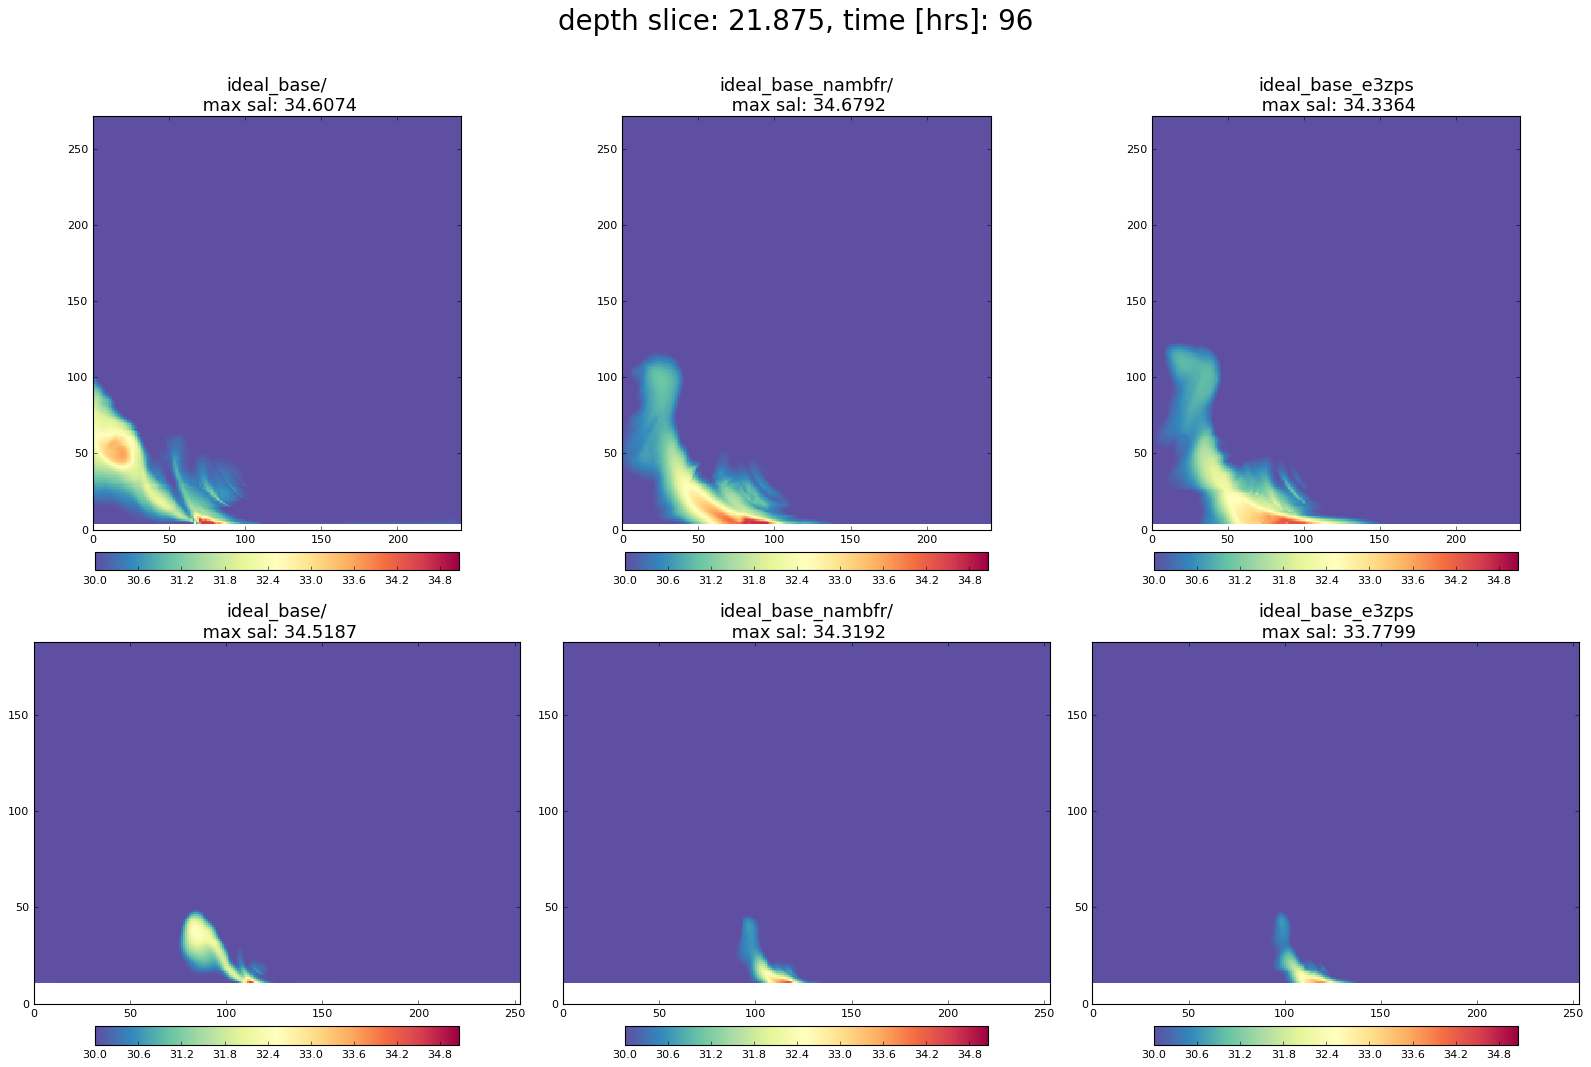

In [11]:
dep_ind = 2
fig = plot_salt(dep_ind, time_ind, vosaline_ref)

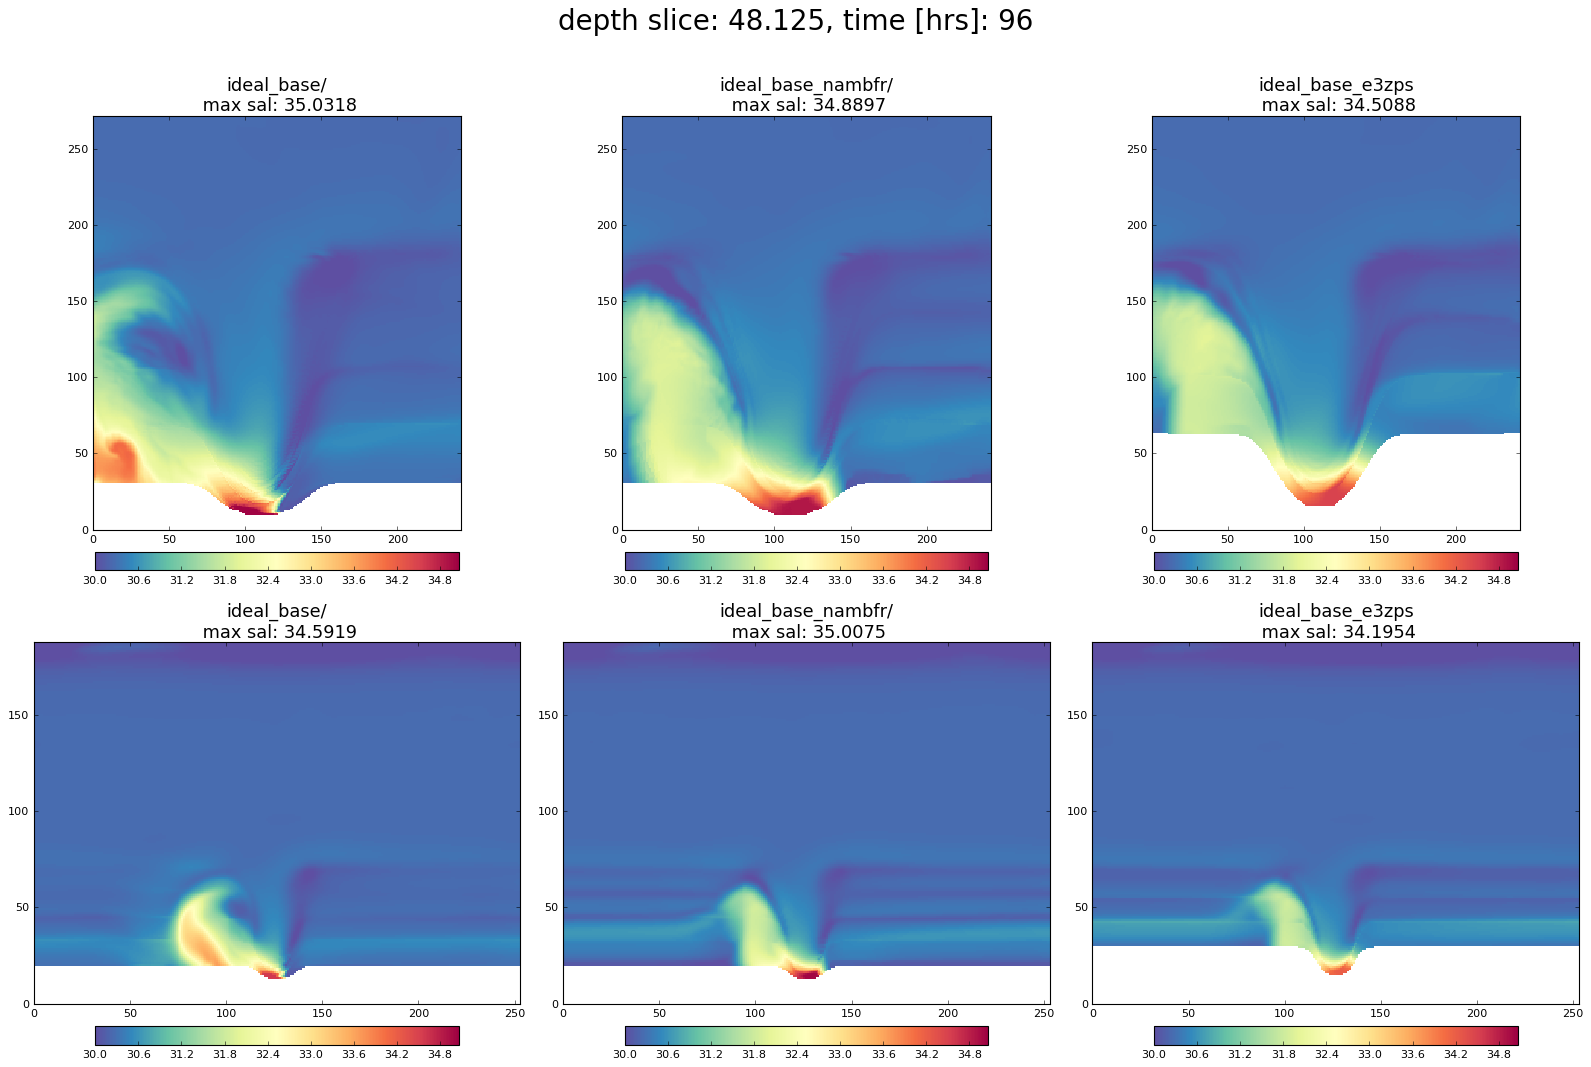

In [12]:
dep_ind = 5
fig = plot_salt(dep_ind, time_ind, vosaline_ref)

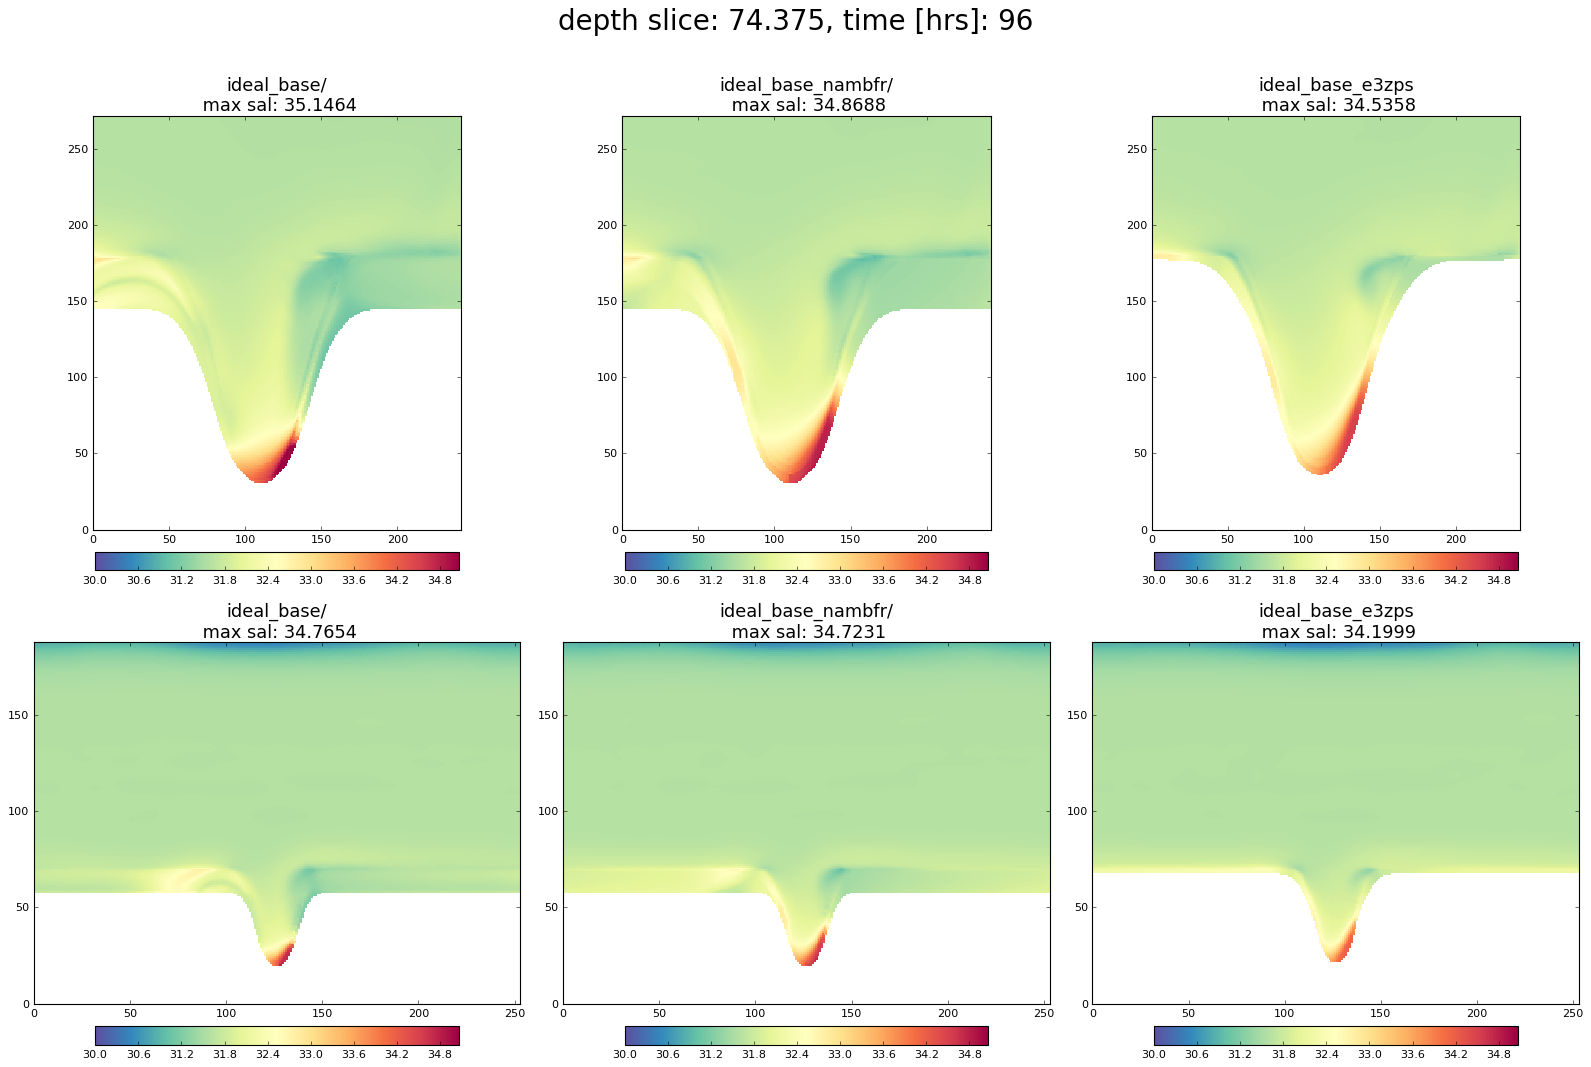

In [13]:
dep_ind = 8
fig = plot_salt(dep_ind, time_ind, vosaline_ref)

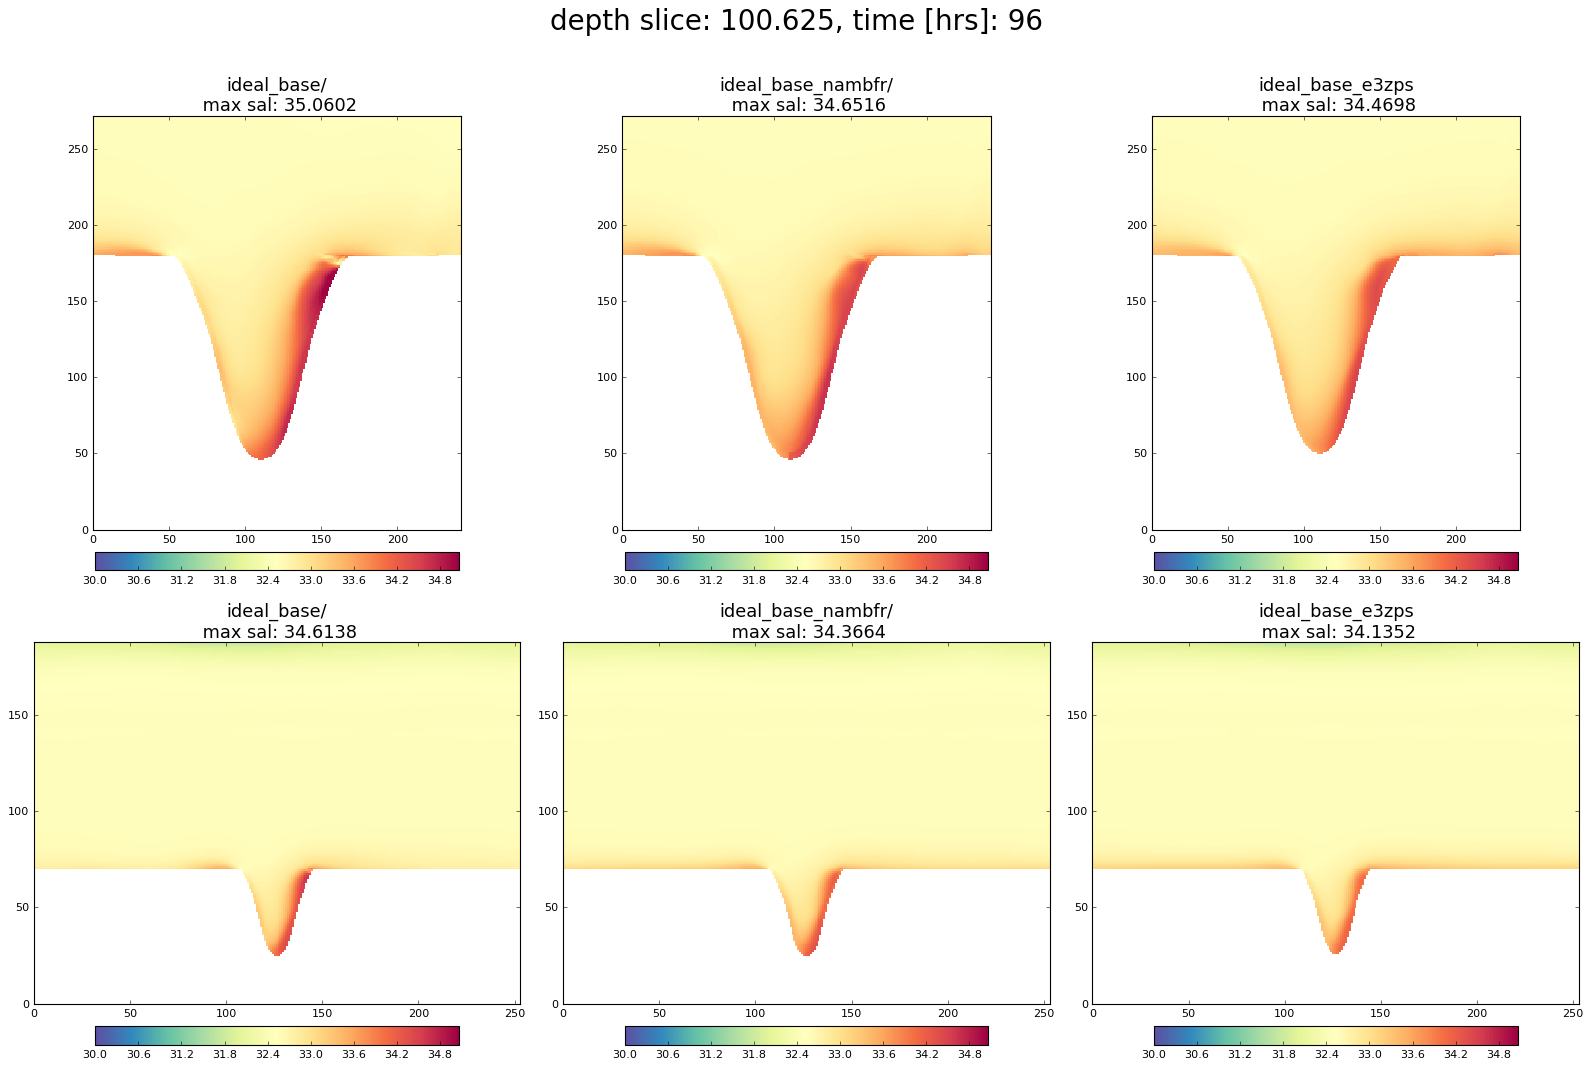

In [14]:
dep_ind = 11
fig = plot_salt(dep_ind, time_ind, vosaline_ref)

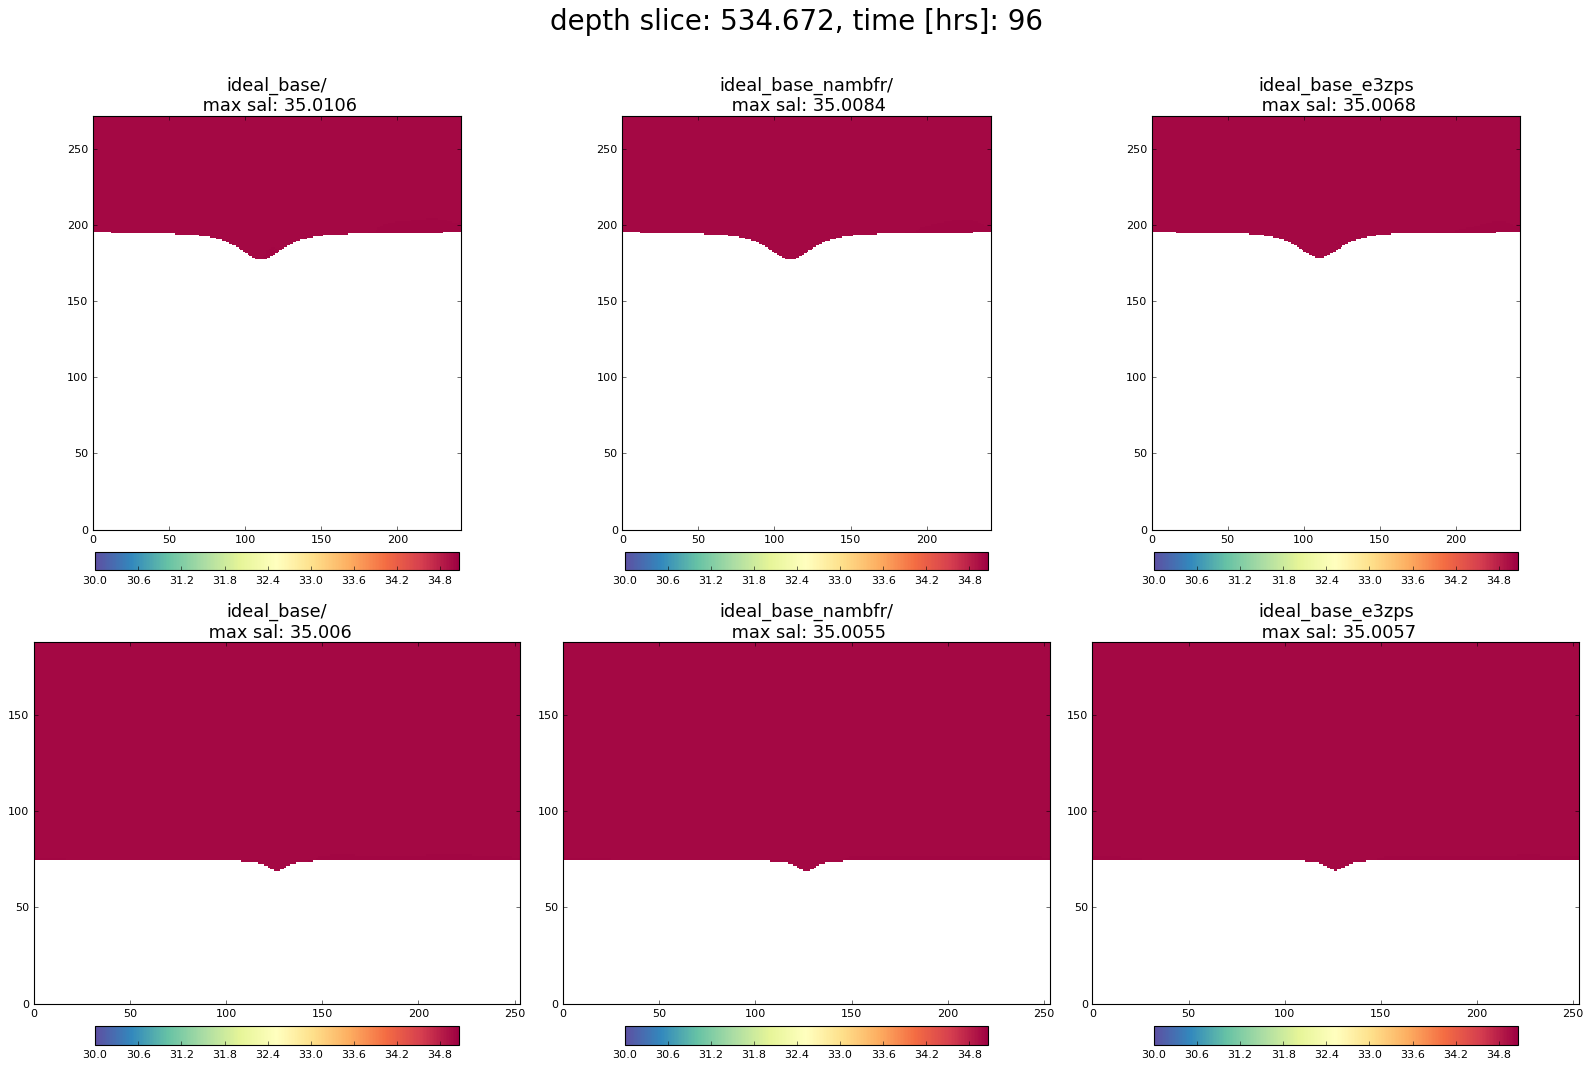

In [15]:
dep_ind = 60
fig = plot_salt(dep_ind, time_ind, vosaline_ref)

# When are salinities too high?
## At slice 74 m (ind 8) 

|child           |time [hrs]| salinity|time [hrs]| salinity|
|----------------|--|-----------------|--|-----------------|
|ideal_double_flt|45|35.08|479|36.6084|
|ideal_double (ts)|44|35.0735|-|-|
|**ideal_base_flt**   |86|35.0699|479|35.6176|
|**ideal_base (ts)**  |85|35.0665|-|-|
|**ideal_base_nambfr**|124|35.0636|-|-|
|**ideal_base_e3zps** |-|-|-|-|
|**ideal_double_e3zps** |116|35.065|359|35.6244|
|ideal_half      |-|-|-|-|
|real_base       |-|-|-|-|
|real_half       |-|-|-|-|



|parent           |time [hrs]| salinity|time [hrs]| salinity|
|----------------|--|-----------------|--|-----------------|
|ideal_double_flt|43|35.0968|479|36.1203|
|ideal_double (ts)|42|35.0874|-|-|
|**ideal_base_flt**   |293|35.0642|479|35.4966|
|**ideal_base (ts)**  |283|35.0641|-|-|
|**ideal_base_nambfr**|171|35.0631|-|-|
|**ideal_base_e3zps** |-|-|-|-|
|**ideal_double_e3zps** |249|35.0636|359|35.2611|
|ideal_half      |-|-|-|-|
|real_base       |-|-|-|-|
|real_half       |-|-|-|-|

In [ ]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/'
fname = '1_MCKNZ_1h_20170101_201701*'
dep_ind = 8

case = 'ideal_double_e3zps/'
for time_ind in range(15*24)[::-1]:
    if time_ind%24==0:
        print(time_ind)
    vosaline, deptht, tmask, e3t = get_vars(fname, dirname+case, dep_ind, time_ind)
    vosaline_max = vosaline.max()
    if vosaline_max > 35.0629:
        print(time_ind, vosaline_max)

# Where do these salinities occur? And cell thickness?

In [55]:
def plot_max_salt(case, fname, time_ind_start):
    dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/'
    dep_ind = 8
    time_inds = [ int(x) for x in np.linspace(time_ind_start, 9*24, 4) ]
    vmin, vmax = 30, vosaline_ref.max()

    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    for ax, time_ind in zip(axes.flatten(), time_inds):
        vosaline, deptht, tmask, e3t = get_vars(fname, dirname+case, dep_ind, time_ind)
        
        salmax_y = np.where(vosaline == vosaline.max())[-2][0]
        salmax_x = np.where(vosaline == vosaline.max())[-1][0]
        salmax_e3t = e3t[salmax_y, salmax_x]
        salmax_tmask = tmask[salmax_y, salmax_x]
        salmax_salt = vosaline[salmax_y, salmax_x]
        e3t_tmask = salmax_e3t * salmax_tmask
        
        p = ax.pcolormesh(vosaline, cmap=cm.Spectral_r, vmin=vmin, vmax=vmax)
        ax.scatter(salmax_x, salmax_y, s=100, c='lightskyblue')
        cbar = fig.colorbar(p, ax=ax, orientation='horizontal', fraction=0.04, pad=0.05)
        ax.set_aspect(aspect='equal')
        ax.set_title('time_ind: ' + str(time_ind) + '\nmax sal: ' + 
                     str(salmax_salt) + '\nthickness: ' + str(np.round(e3t_tmask, 4)), fontsize=16)
        ax.set_xlim([0,vosaline.shape[-1]])
        ax.set_ylim([0,vosaline.shape[-2]])
        fig.tight_layout(rect=[0, 0.03, 1, 0.94])
        fig.suptitle('depth slice: ' + str(deptht[dep_ind]) + ', case: ' + case, fontsize=25)
    return fig

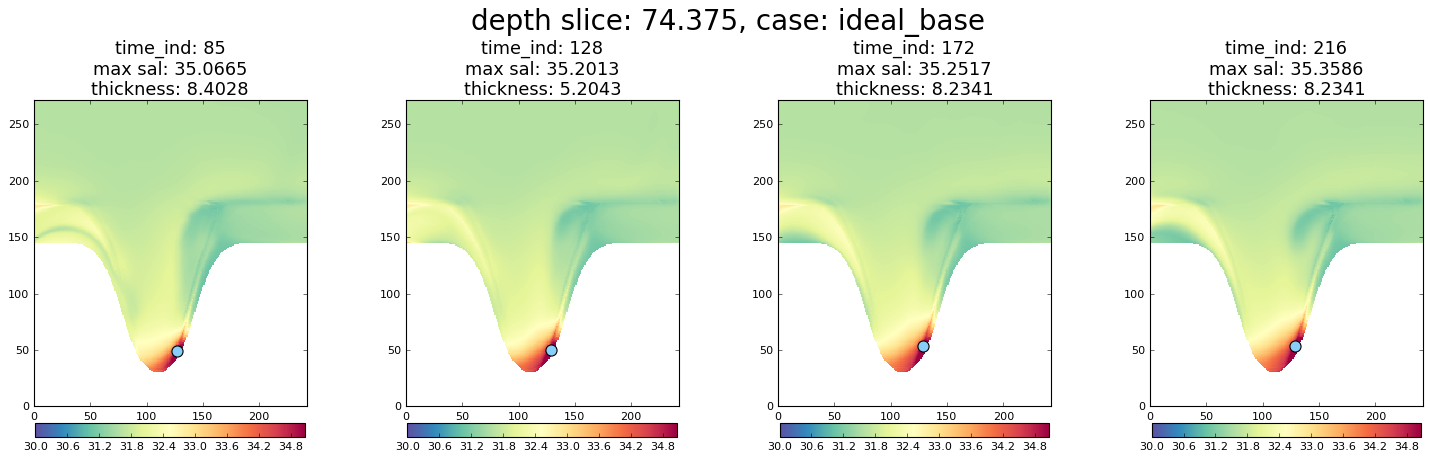

In [56]:
case = 'ideal_base'
fname = '1_MCKNZ_1h_20170101_201701*'
time_ind_start = 85
fig = plot_max_salt(case, fname, time_ind_start)

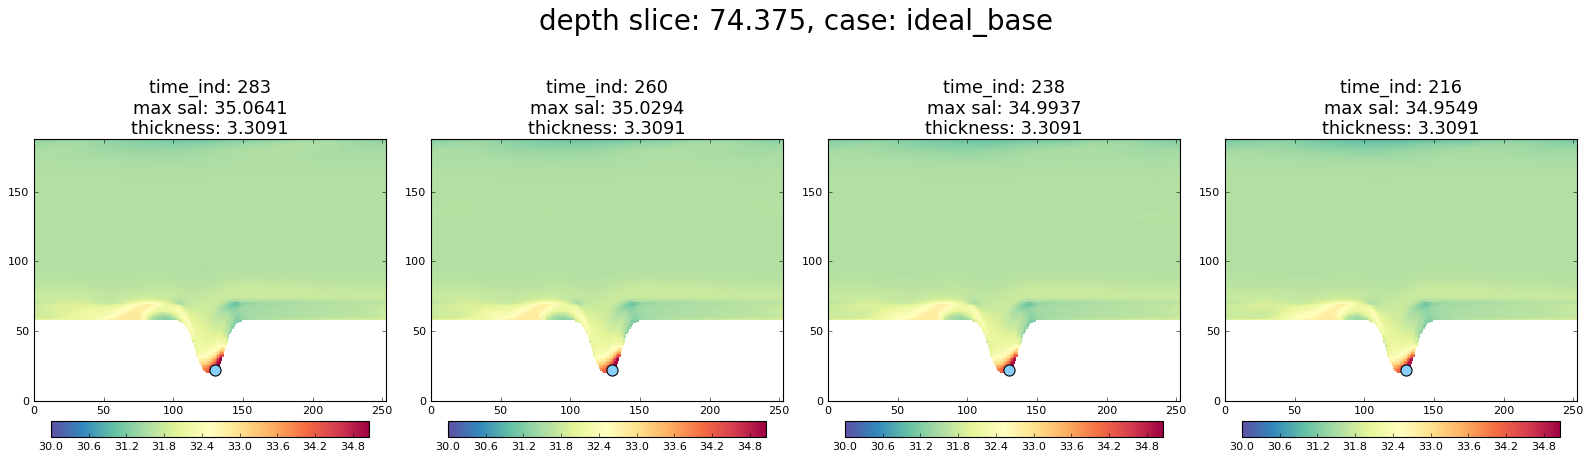

In [57]:
case = 'ideal_base'
fname = 'MCKNZ_1h_20170101_201701*'
time_ind_start = 283
fig = plot_max_salt(case, fname, time_ind_start)

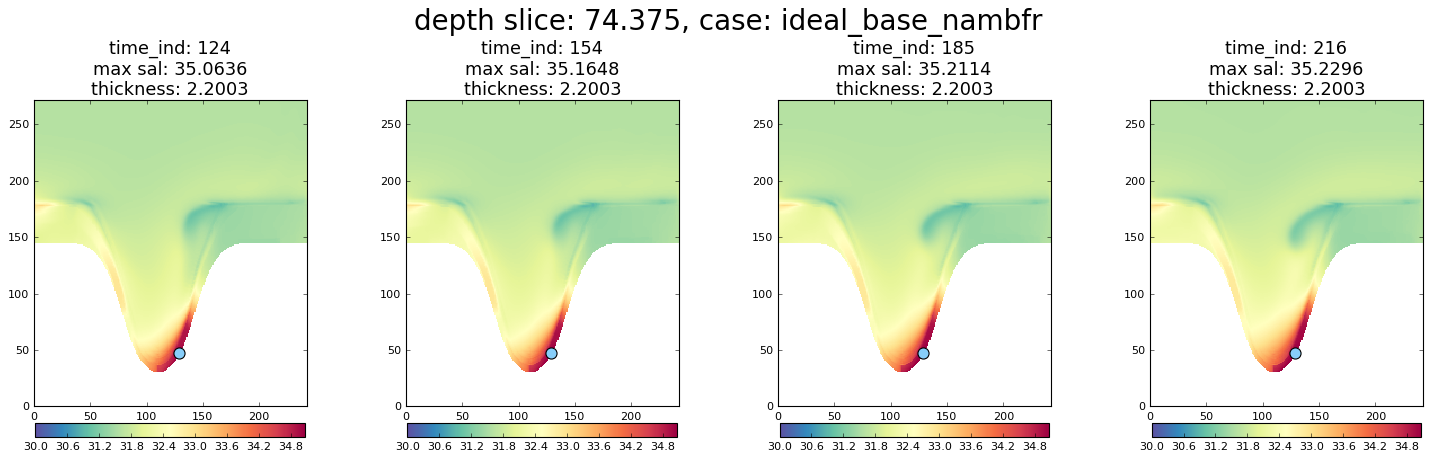

In [58]:
case = 'ideal_base_nambfr'
fname = '1_MCKNZ_1h_20170101_201701*'
time_ind_start = 124
fig = plot_max_salt(case, fname, time_ind_start)

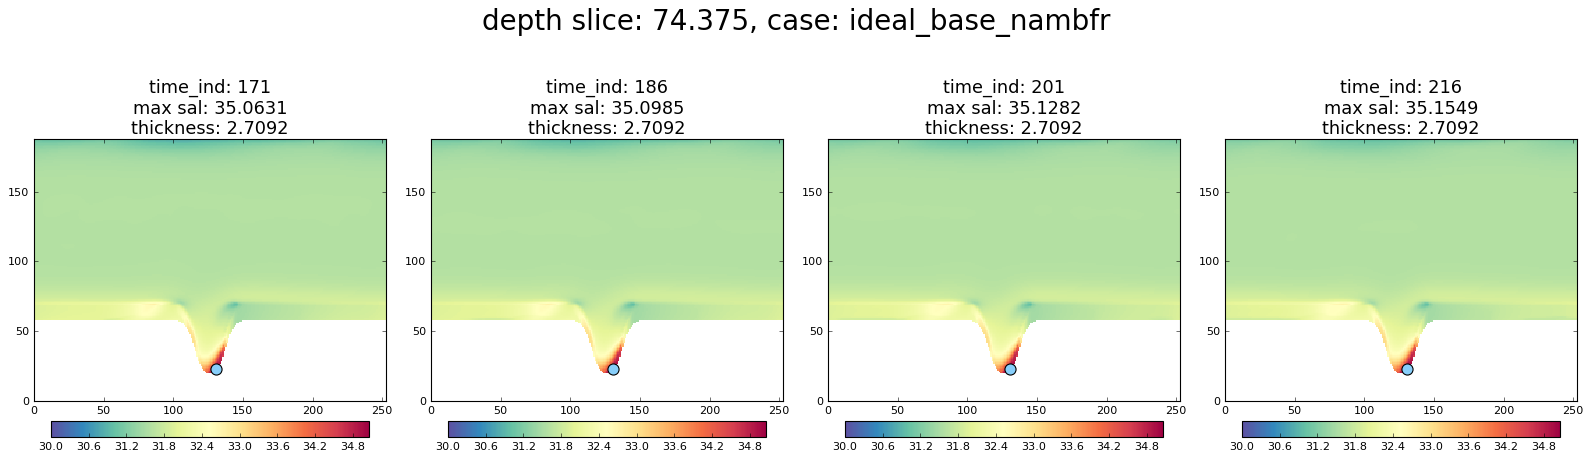

In [59]:
case = 'ideal_base_nambfr'
fname = 'MCKNZ_1h_20170101_201701*'
time_ind_start = 171
fig = plot_max_salt(case, fname, time_ind_start)

# Do the high salinities only occur once per slice per time?

In [44]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/'
dep_ind = 8

In [41]:
def print_max_salt(case, fname, time_ind_start):
    print('time ind --- max salt --- y ind --- x ind')
    for time_ind in range(time_ind_start, 479)[::25]:
        vosaline, deptht, tmask, e3t = get_vars(fname, dirname+case, dep_ind, time_ind)
        vosaline_max = vosaline.max()
        if vosaline_max > 35.0629:
            print(time_ind, vosaline_max, np.where(vosaline == vosaline_max))
            
    return

# How does e3t look on this slice?

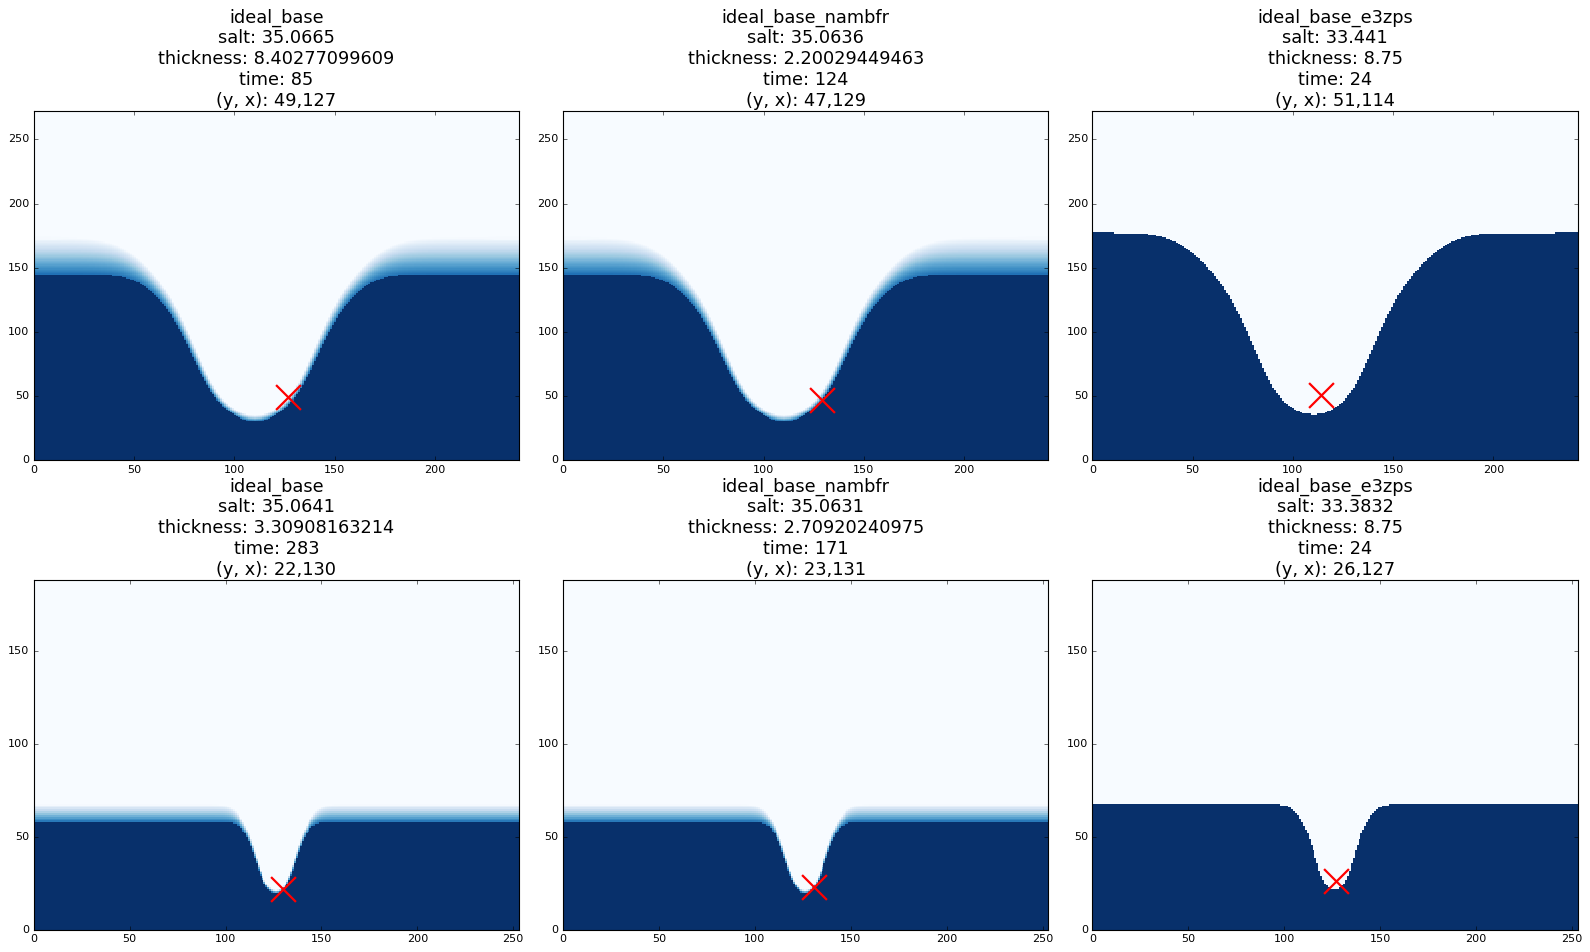

In [12]:
dep_ind=8
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/'
cases = ['ideal_base', 'ideal_base_nambfr', 'ideal_base_e3zps']

fig, (axesA, axesB) = plt.subplots(2, 3, figsize=(20, 12))
fnames = ['1_MCKNZ_1h_20170101_201701*', 'MCKNZ_1h_20170101_201701*']
time_inds_all = [[85, 124, 24], [283, 171, 24]]
for axes, fname, time_inds, m in zip([axesA, axesB], fnames, time_inds_all, np.arange(2)):
    for n, case, time_ind in zip(np.arange(3), cases, time_inds):
        vosaline, deptht, tmask, e3t = get_vars(fname, dirname+case, dep_ind, time_ind)
        p = axes[n].pcolormesh(e3t * tmask, cmap=cm.Blues_r)
        axes[n].set_xlim([0, vosaline.shape[-1]])
        axes[n].set_ylim([0, vosaline.shape[-2]])
        
        salmax_y = np.where(vosaline == vosaline.max())[-2][0]
        salmax_x = np.where(vosaline == vosaline.max())[-1][0]
        salmax_e3t = e3t[salmax_y, salmax_x]
        salmax_tmask = tmask[salmax_y, salmax_x]
        salmax_salt = vosaline[salmax_y, salmax_x]
        e3t_tmask = salmax_e3t * salmax_tmask
        
        axes[n].scatter(salmax_x, salmax_y, s=500, marker='x', c='r', lw=2)
        axes[n].set_title(case+'\nsalt: '+str(salmax_salt)+
                          '\nthickness: '+str(e3t_tmask)+'\ntime: '+str(time_ind) + 
                          '\n(y, x): '+str(salmax_y)+','+str(salmax_x), fontsize=16)
fig.tight_layout(h_pad=0.2)

# What are we doing for the bottom boundary layer?


Looking at ideal_base_flt/namelist_cfg and 1_namelist_cfg:

    !-----------------------------------------------------------------------
    &nambfr        !   bottom friction
    !-----------------------------------------------------------------------
       nn_bfr      =    2      !  type of bottom friction :   = 0 : free slip,  = 1 : linear friction  


    !-----------------------------------------------------------------------
    &nambbl        !   bottom boundary layer scheme
    !-----------------------------------------------------------------------
    /
    
Now, ideal_base_flt/namelist_ref:

    !!======================================================================
    !!                 ***  Bottom boundary condition  ***
    !!======================================================================
    !!   nambfr        bottom friction
    !!   nambbc        bottom temperature boundary condition
    !!   nambbl        bottom boundary layer scheme                         ("key_trabbl")
    !!======================================================================

    !-----------------------------------------------------------------------
    &nambfr        !   bottom friction
    !-----------------------------------------------------------------------                                                                            
       nn_bfr      =    1      !  type of bottom friction :   = 0 : free slip,  = 1 : linear friction                                                   
                               !                              = 2 : nonlinear friction                                                                  
       rn_bfri1    =    4.e-4  !  bottom drag coefficient (linear case)                                                                                 
       rn_bfri2    =    1.e-3  !  bottom drag coefficient (non linear case). Minimum coeft if ln_loglayer=T                                             
       rn_bfri2_max =   1.e-1  !  max. bottom drag coefficient (non linear case and ln_loglayer=T)                                                      
       rn_bfeb2    =    2.5e-3 !  bottom turbulent kinetic energy background  (m2/s2)                                                                   
       rn_bfrz0    =    3.e-3  !  bottom roughness [m] if ln_loglayer=T                                                                                 
       ln_bfr2d    = .false.   !  horizontal variation of the bottom friction coef (read a 2D mask file )                                               
       rn_bfrien   =    50.    !  local multiplying factor of bfr (ln_bfr2d=T)                                                                          
       rn_tfri1    =    4.e-4  !  top drag coefficient (linear case)                                                                                    
       rn_tfri2    =    2.5e-3 !  top drag coefficient (non linear case). Minimum coeft if ln_loglayer=T                                                
       rn_tfri2_max =   1.e-1  !  max. top drag coefficient (non linear case and ln_loglayer=T)                                                         
       rn_tfeb2    =    0.0    !  top turbulent kinetic energy background  (m2/s2)                                                                      
       rn_tfrz0    =    3.e-3  !  top roughness [m] if ln_loglayer=T                                                                                    
       ln_tfr2d    = .false.   !  horizontal variation of the top friction coef (read a 2D mask file )                                                  
       rn_tfrien   =    50.    !  local multiplying factor of tfr (ln_tfr2d=T)                                                                          

       ln_bfrimp   = .true.    !  implicit bottom friction (requires ln_zdfexp = .false. if true)                                                       
       ln_loglayer = .false.   !  logarithmic formulation (non linear case)
       
       
    !-----------------------------------------------------------------------
    &nambbl        !   bottom boundary layer scheme
    !-----------------------------------------------------------------------                                                                            
       nn_bbl_ldf  =  1      !  diffusive bbl (=1)   or not (=0)                                                                                        
       nn_bbl_adv  =  0      !  advective bbl (=1/2) or not (=0)                                                                                        
       rn_ahtbbl   =  1000.  !  lateral mixing coefficient in the bbl  [m2/s]                                                                           
       rn_gambbl   =  10.    !  advective bbl coefficient                 [s]
    /


    [imachuca@seawolf2 mackenzie03agrif]$ more cpp_mackenzie03agrif.fcm 
     bld::tool::fppkeys key_dynspg_ts key_ldfslp key_zdftke key_iomput key_nosignedzero key_bdy key_traldf_eiv key_mpp_mpi key_netcdf4 key_dynldf_c2d key_agrif key_diaar5
     
NEMO book: "Bottom Boundary Layer (trabbl.F90 - key trabbl)"

# What are the vertical velocities here?

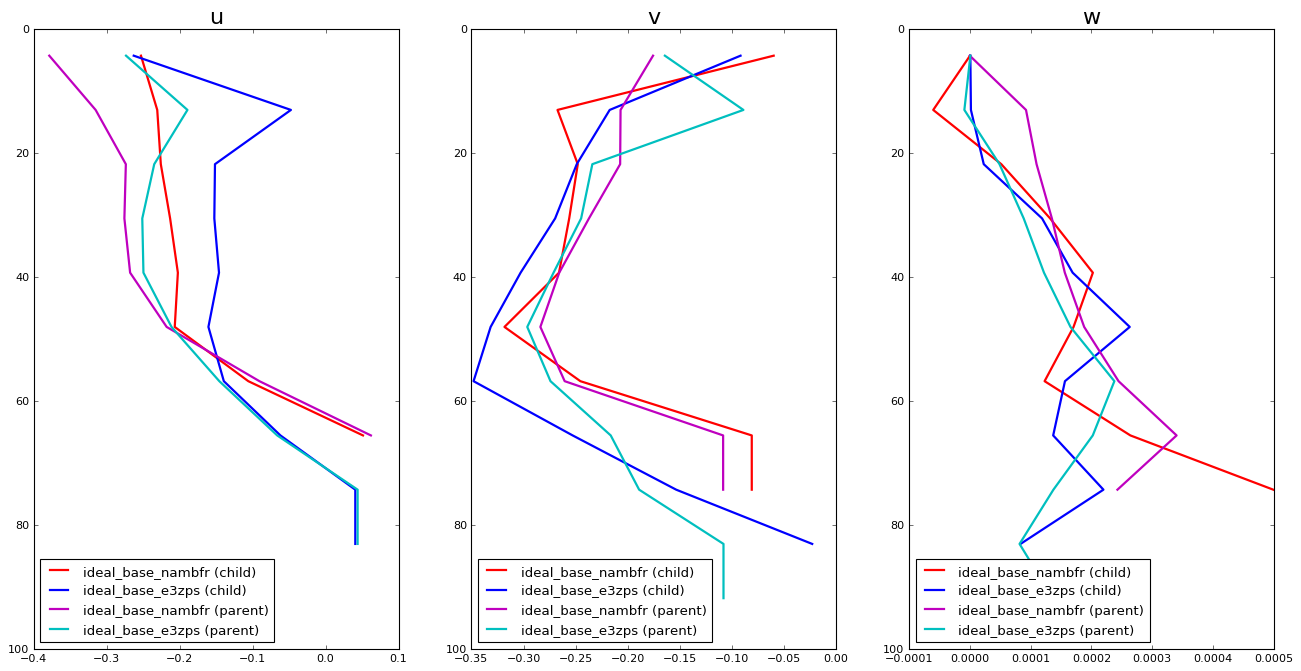

In [79]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/'
cases = ['ideal_base_nambfr', 'ideal_base_e3zps', 'ideal_base_nambfr', 'ideal_base_e3zps']
fnames = ['1_MCKNZ_1h_20170101_201701*',
          '1_MCKNZ_1h_20170101_201701*',
          'MCKNZ_1h_20170101_201701*',
          'MCKNZ_1h_20170101_201701*']
time_inds = [85, 44, 283, 42]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
for ax, n, ttl in zip([ax1, ax2, ax3], np.arange(3), ['u', 'v', 'w']):
    for case, fname, time_ind, c in zip(cases, fnames, time_inds, ['r', 'b', 'm', 'c']):
        if fname == '1_MCKNZ_1h_20170101_201701*':
            kind=' (child)'
        else:
            kind=' (parent)'
        vosaline, deptht, tmask, e3t = get_vars(fname, dirname+case, dep_ind, time_ind)
        salmax_y = np.where(vosaline == vosaline.max())[-2][0]
        salmax_x = np.where(vosaline == vosaline.max())[-1][0]
        vozocrtx, vomecrty, vovecrtz = get_vel(fname, dirname+case, time_ind, salmax_y, salmax_x)
        if ttl == 'u':
            vel = vozocrtx
        elif ttl == 'v':
            vel = vomecrty
        elif ttl == 'w':
            vel = vovecrtz
        ax.plot(vel, deptht, c=c, label = case+kind, lw=2)
    ax.legend(loc=3)
    ax.set_title(ttl, fontsize=20)
    ax.set_ylim([100, 0])